<h3>Name: George Mohsen</h3>
<h3>ID: 43768</h3>

In [37]:
import numpy as np
import cv2
from scipy import signal as sig
import matplotlib.pyplot as plt

<h3>Function to convert BGR to RGB in order to be drawn correctly when using matplotlib</h3>

In [38]:
def bgr_to_rgb(image):
    im2 = image.copy()
    im2[:, :, 0] = image[:, :, 2]
    im2[:, :, 2] = image[:, :, 0]
    plt.imshow(im2)

<h3>Functions used to find return the gradients in both x and y dimensions</h3>

In [39]:
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')    

<h3>Load image in grayscale and BGR</h3>

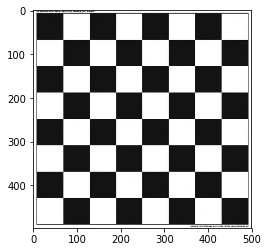

In [40]:
image = cv2.imread('Desktop/chess.jpg',0)
img = cv2.imread('Desktop/chess.jpg',1)
plt.imshow(image, cmap='gray')

<h3>Parameters needed</h3>

In [41]:
I_x = gradient_x(image)
I_y = gradient_y(image)

Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

k = 0.04

height, width = image.shape
cornerList = []
window_size = 3
thresh = 100000000
offset = int(window_size/2)
color_img = np.copy(img)

In [42]:
for y in range(offset, height - offset):
    for x in range(offset, width - offset):
        windowIxx = Ixx[y - offset:y + offset + 1, x - offset:x + offset + 1]
        windowIxy = Ixy[y - offset:y + offset + 1, x - offset:x + offset + 1]
        windowIyy = Iyy[y - offset:y + offset + 1, x - offset:x + offset + 1]

        Sxx = windowIxx.sum()
        Sxy = windowIxy.sum()
        Syy = windowIyy.sum()

        det = (Sxx * Syy) - (Sxy ** 2)
        trace = Sxx + Syy
        r = det - k * (trace ** 2)

        if r > thresh:
            color_img[y,x] = [0,0,255]

c:\users\egypt_laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in int_scalars
  # This is added back by InteractiveShellApp.init_path()


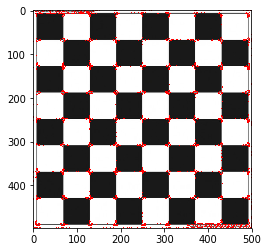

In [43]:
bgr_to_rgb(color_img)

<h3>By using the default opencv Harries Corner Detector</h3>

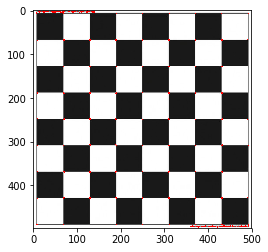

In [44]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

img[dst>0.01*dst.max()]=[0,0,255]
bgr_to_rgb(img)